In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from typing import Union, Optional, Dict, Tuple, Any

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin, pairwise_distances

In [52]:
customers = pd.read_csv('../datasets/mall_customers/Mall_Customers.csv').dropna(how='all')
customers

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [53]:
customers.drop('CustomerID', axis=1, inplace=True)
customers

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [54]:
customers.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.4 KB


In [55]:
customers['Gender'] = (customers['Gender'] == "Male").astype("int8")
customers['Gender'].value_counts()

Gender
0    112
1     88
Name: count, dtype: int64

<Axes: >

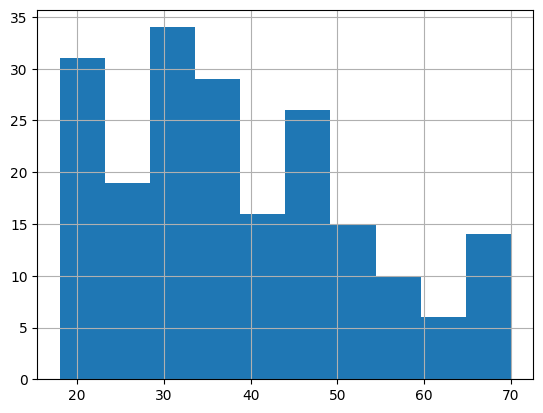

In [56]:
customers['Age'].hist()

<Axes: >

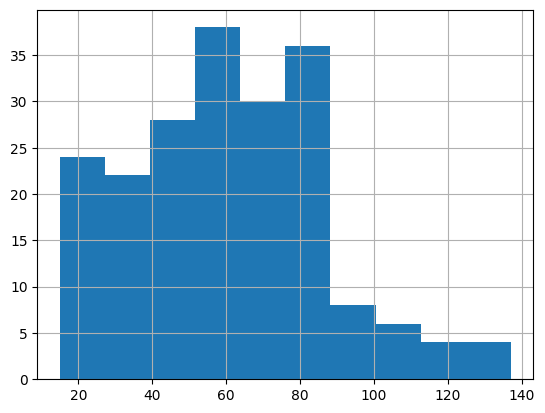

In [57]:
customers['Annual Income (k$)'].hist()

<Axes: >

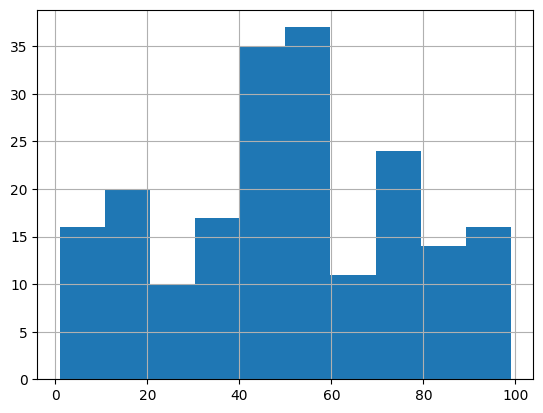

In [58]:
customers['Spending Score (1-100)'].hist()

In [59]:
scaler = StandardScaler()
scal_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
customers[scal_columns] = scaler.fit_transform(customers[scal_columns])
customers

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,-1.424569,-1.738999,-0.434801
1,1,-1.281035,-1.738999,1.195704
2,0,-1.352802,-1.700830,-1.715913
3,0,-1.137502,-1.700830,1.040418
4,0,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,0,-0.276302,2.268791,1.118061
196,0,0.441365,2.497807,-0.861839
197,1,-0.491602,2.497807,0.923953
198,1,-0.491602,2.917671,-1.250054


In [60]:
kmeans = KMeans(n_clusters=4, init='random', n_init=10)
kmeans.fit(customers)
y_kmeans_1 = kmeans.predict(customers)

In [61]:
y_kmeans_1

array([3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3,
       2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3,
       3, 2, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2,
       2, 3, 1, 3, 3, 3, 2, 2, 2, 2, 3, 1, 0, 0, 1, 0, 1, 0, 2, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int32)

In [62]:
kmeans.score(customers)

-254.28290726083475